<AxesSubplot: xlabel='SNOW', ylabel='Count'>

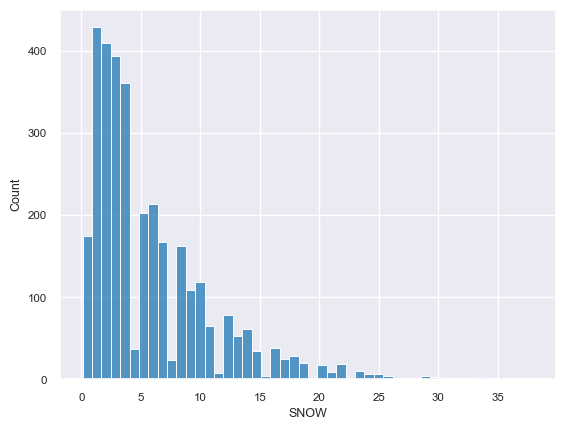

In [42]:
import pandas as pd
import seaborn as sb

sb.set_style('darkgrid')
sb.set_context("notebook", font_scale=0.75, rc={" figure.figsize ":( 3 , 4 )})

df = pd.read_csv('./data/alta-noaa-1980-2019.csv')
snow = df.SNOW.rename(pd.to_datetime(df.DATE))

sb.histplot(snow[snow > 0])

<AxesSubplot: xlabel='SNOW', ylabel='Density'>

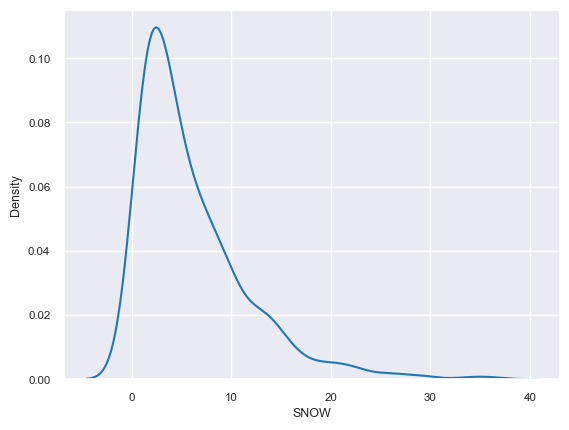

In [32]:
sb.kdeplot(snow[lambda s: (s.index.month == 1) & (s > 0)])

<AxesSubplot: ylabel='SNOW'>

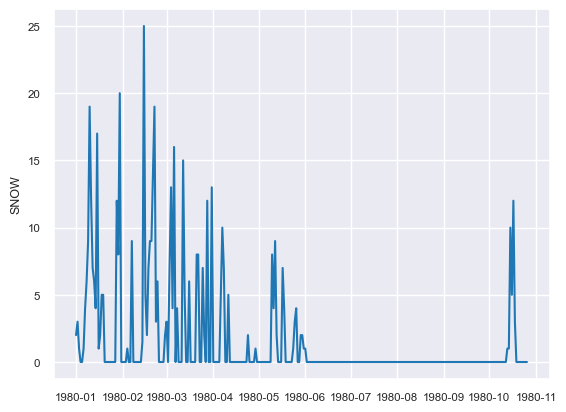

In [33]:
sb.lineplot(snow.iloc[:300])

<AxesSubplot: >

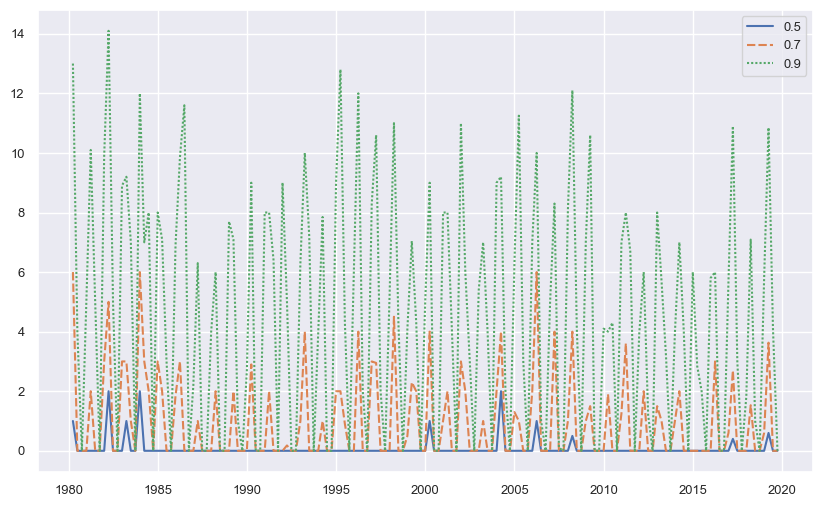

In [50]:
import pandas as pd
import seaborn as sb

sb.set(rc={'figure.figsize':(10,6)})
sb.set_style('darkgrid')
sb.set_context("notebook", font_scale=0.85)

df = pd.read_csv('./data/alta-noaa-1980-2019.csv')
snow = df.SNOW.rename(pd.to_datetime(df.DATE))

q_snow = snow.resample('Q').quantile([0.5, 0.7, 0.9]).unstack()

sb.lineplot(q_snow)

       index   make
0      Other  26622
1  Chevrolet   4003
2       Ford   3371
3      Dodge   2583
4        GMC   2494
5     Toyota   2071


/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_18420/3631449092.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/vehicles.csv')


<AxesSubplot: xlabel='make', ylabel='index'>

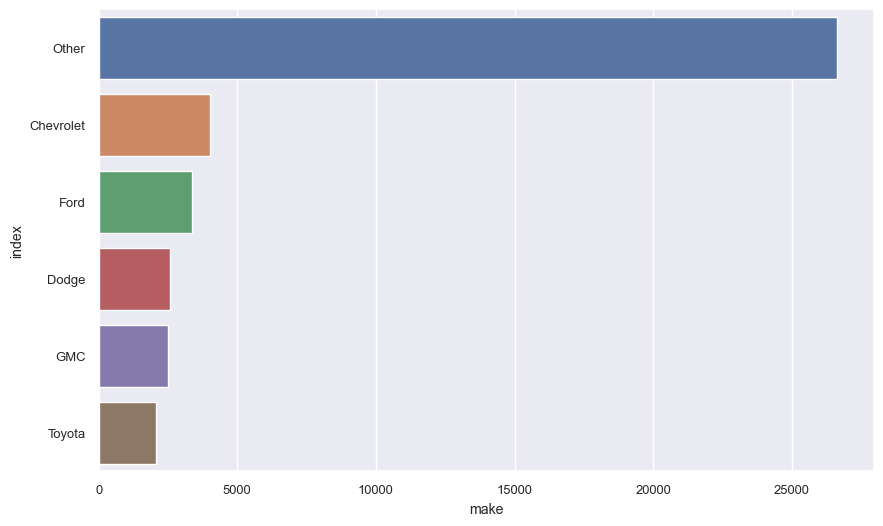

In [77]:
df = pd.read_csv('./data/vehicles.csv')
make = df.make

top5 = make.value_counts().index[:5]
vc_make = make.where(make.isin(top5), other='Other')

amount = vc_make.value_counts().reset_index()
print(amount)

sb.barplot(data=amount, x='make', y='index')
# vc_make.value_counts()